# mnist into string

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
import cv2
from PIL import Image , ImageDraw

train_img=np.load("train_img.npy")
test_img=np.load("test_img.npy")
train_lab=np.load("train_lab.npy")
test_lab=np.load("test_lab.npy")

# Select i random digits from the training set
indices = np.random.randint(0, len(train_img), size=3)
digits = [train_img[idx] for idx in indices]
labels = [train_lab[idx] for idx in indices]
len(indices)

3

In [160]:
def contour_resize(digit):
    # Apply binary thresholding to the image
    ret, thresh = cv2.threshold(digit, 0, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for region in contours:
        # Extract bounding box coordinates
        x, y, w, h = cv2.boundingRect(region)

        # Draw rectangle around region
        #imp=cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 1)
    cropped = digit[y:y+h, x:x+w-1]
    return cropped

In [161]:
import random

# Define a list of multidigit sizes
sizes = range(3, 11)

# Define a dictionary to store the image and label lists for each size
data_dict = {}

# Loop over the sizes and generate 1000 random samples for each size
for size in sizes:
    image_list = []
    label_list = []
    bounding_boxes_list = []
    for i in range(1000):
        # Generate a random list of indices for selecting the images
        indices = np.random.choice(len(train_img), size, replace=False)
        
        # Select the images and labels using the indices
        images = [train_img[idx] for idx in indices]
        labels = [train_lab[idx] for idx in indices]
        digits_resized=[]
        bounding_boxes = []
        x_offset = 0 
        for i in range(len(images)):
            x=contour_resize(images[i])
            x=x[:,1:17]
            digits_resized.append(x)
            # Calculate the bounding box coordinates based on the current digit image and its position within the concatenated image
            h, w = x.shape[:2]
            bounding_boxes.append((x_offset, 0, w, h))
            
            # Update the offset for the next digit image
            x_offset += w

        # Find the maximum height among all the images
        max_height = max(img.shape[0] for img in digits_resized)

        # Pad each image to have the same height
        padded_images = []
        for img in digits_resized:
            pad_top = (max_height - img.shape[0]) // 2
            pad_bottom = max_height - img.shape[0] - pad_top
            padded_img = np.pad(img, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=0)
            padded_images.append(padded_img)
        
        # Concatenate the images horizontally
        concatenated_image = np.concatenate(padded_images, axis=1)
        
        # Concatenate the images and labels
        concatenated_label = ''.join(map(str, labels))
        
        # Check if the label is unique
        while concatenated_label in label_list:
            # Generate new labels
            labels = [random.randint(0, 9) for _ in range(size)]
            concatenated_label = ''.join(map(str, labels))

        # Append the concatenated image and label to the lists
        image_list.append(concatenated_image)
        label_list.append(concatenated_label)
        bounding_boxes_list.append(bounding_boxes)

    # Add the lists to the data dictionary
    data_dict[f'size_{size}'] = {'images': image_list, 'labels': label_list, 'bounding_boxes': bounding_boxes_list}


In [162]:
import matplotlib
matplotlib.use('TkAgg')

img=data_dict['size_3']['images'][10].copy()
print(data_dict['size_3']['labels'][10])
print(data_dict['size_3']['bounding_boxes'][10])
plt.imshow(img, cmap='gray')
plt.show()

987
[(0, 0, 14, 20), (14, 0, 14, 20), (28, 0, 16, 20)]


In [163]:
for bbox in data_dict['size_3']['bounding_boxes'][10]:
    x, y, w, h = bbox
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 1)  # Green color rectangle
plt.imshow(img, cmap='gray')
plt.show()       

# not cramped digits

In [164]:
import random

# Define a list of multidigit sizes
sizes = range(3, 11)

# Define a dictionary to store the image and label lists for each size
data_dict1 = {}

# Loop over the sizes and generate 1000 random samples for each size
for size in sizes:
    image_list = []
    label_list = []
    bounding_boxes_list = []
    for i in range(1000):
        # Generate a random list of indices for selecting the images
        indices = np.random.choice(len(train_img), size, replace=False)
        
        # Select the images and labels using the indices
        images = [train_img[idx] for idx in indices]
        labels = [train_lab[idx] for idx in indices]
        digits_resized=[]
        bounding_boxes = []
        x_offset = 0 
        for i in range(len(images)):
            x=contour_resize(images[i])
            
            digits_resized.append(x)
            # Calculate the bounding box coordinates based on the current digit image and its position within the concatenated image
            h, w = x.shape[:2]
            bounding_boxes.append((x_offset, 0, w, h))
            
            # Update the offset for the next digit image
            x_offset += w

        # Find the maximum height among all the images
        max_height = max(img.shape[0] for img in digits_resized)

        # Pad each image to have the same height
        padded_images = []
        for img in digits_resized:
            pad_top = (max_height - img.shape[0]) // 2
            pad_bottom = max_height - img.shape[0] - pad_top
            padded_img = np.pad(img, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=0)
            padded_images.append(padded_img)
        
        # Concatenate the images horizontally
        concatenated_image = np.concatenate(padded_images, axis=1)
        
        # Concatenate the images and labels
        concatenated_label = ''.join(map(str, labels))
        
        # Check if the label is unique
        while concatenated_label in label_list:
            # Generate new labels
            labels = [random.randint(0, 9) for _ in range(size)]
            concatenated_label = ''.join(map(str, labels))

        # Append the concatenated image and label to the lists
        image_list.append(concatenated_image)
        label_list.append(concatenated_label)
        bounding_boxes_list.append(bounding_boxes)

    # Add the lists to the data dictionary
    data_dict1[f'size_{size}'] = {'images': image_list, 'labels': label_list, 'bounding_boxes': bounding_boxes_list}


In [165]:
###################simulate the dotted line in real data
def draw_line(img):
    dot_x = 0
    dot_y = img.shape[0]/2
    dot_size = 50
    
    x = Image.fromarray(img)
    draw = ImageDraw.Draw(x)
   
    # Define the gradient colors for each line in the dot
    gradient_colors = [(255, 0, 0), (0, 255, 0)]

    # Draw each line with a different color from the gradient to create a multicolor dot
    for i in range(0,dot_size):
        # Calculate the color for this line by interpolating between two colors in the gradient
        line_color = tuple(int((1 - t) * gradient_colors[i % len(gradient_colors)][j] + t * gradient_colors[(i+1) % len(gradient_colors)][j]) for j,t in enumerate(((i % len(gradient_colors)) / float(len(gradient_colors)),)))
        #line_color=(255,)
        # Draw the line with this color
        draw.line((dot_x + i*3+1 , dot_y , dot_x + i*3 +1 , dot_y), fill=line_color, width=1)
    img=np.asarray(x)
    return img




In [172]:

all_images = []
for size_key in data_dict1.keys():
    images_list = data_dict1[size_key]['images']
    all_images.extend(images_list)
for size_key in data_dict.keys():
    images_list = data_dict[size_key]['images']
    all_images.extend(images_list)



In [173]:
imges=[]
for img in all_images:
    imges.append(draw_line(img))

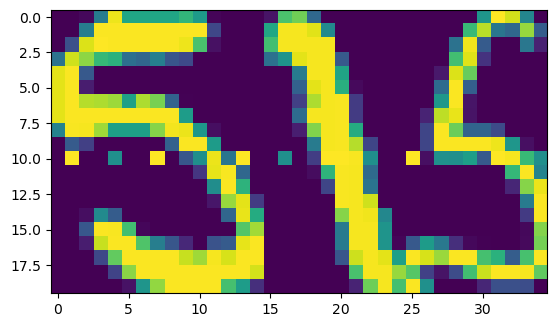

In [174]:
%matplotlib inline

plt.imshow(imges[0])
plt.show()


In [175]:
all_labels = []
for size_key in data_dict1.keys():
    labels_list = data_dict1[size_key]['labels']
    all_labels.extend(labels_list)
for size_key in data_dict.keys():
    labels_list = data_dict[size_key]['labels']
    all_labels.extend(labels_list)

In [176]:
all_boxes=[]
for size_key in data_dict1.keys():
    lbox_list = data_dict1[size_key]['bounding_boxes']
    all_boxes.extend(lbox_list)
for size_key in data_dict.keys():
    lbox_list = data_dict[size_key]['bounding_boxes']
    all_boxes.extend(lbox_list)

In [177]:
from sklearn.utils import shuffle

combined = list(zip(imges, all_labels, all_boxes))

# Shuffle the combined list
random.shuffle(combined)

# Unzip the shuffled list back into separate lists
imges, all_labels , all_boxes = zip(*combined)

In [178]:
from PIL import Image
import os

file_name=[]
# Save the images and labels as JPEG files
for i, image in enumerate(imges):
    label = all_labels[i]
    filename = f'image_{i}_label_{label}.jpg'
    file_name.append(filename)
    filepath = os.path.join('C:/Users/mariem/projects/new_pfe/preprocessed_images/', filename)
    
    im = Image.fromarray(image)
    #im.save(filepath)



In [179]:
num_entries = len(file_name)

print("num_entries:", num_entries)

# Define the array of IDs
Id = np.arange(1, 1+num_entries )

print("Id:", Id)

num_entries: 16000
Id: [    1     2     3 ... 15998 15999 16000]


In [156]:
dfx=df.copy()

In [182]:
x=[]
y=[]
for i in imges:
    
    x.append(i.shape[0])
    y.append(i.shape[1])

In [183]:
import pandas as pd
import numpy as np
num_entries = len(file_name)

# Generate an array of IDs ranging from 1 to the length of the DataFrame
# Create DataFrame
data = {
    'id': Id,
    'filename': file_name,
    'width' : y,
    'height' : x,
    'class' : 'Digit',
    'box': list(all_boxes)
}
df = pd.DataFrame(data)


In [184]:
def explode_boxes(row):
    row['box'] = row['box'] if isinstance(row['box'], list) else []
    if row['box']:
        return pd.DataFrame(row).explode('box')
    else:
        return row
dff=dfx.copy()
# Apply the function to each row in the DataFrame
dff = dff.explode('box')

# Create separate columns for each coordinate
dff[['xmin', 'ymin', 'xmax', 'ymax']] = pd.DataFrame(dff['box'].tolist(), index=dff.index)
dff.drop('box', axis=1, inplace=True)


In [185]:
dff

,id,filename,width,height,class,xmin,ymin,xmax,ymax
0,1,image_0_label_2628286247.jpg,157,20,Digit,0,0,19,20
0,1,image_0_label_2628286247.jpg,157,20,Digit,19,0,11,20
0,1,image_0_label_2628286247.jpg,157,20,Digit,30,0,12,20
0,1,image_0_label_2628286247.jpg,157,20,Digit,42,0,19,20
0,1,image_0_label_2628286247.jpg,157,20,Digit,61,0,19,20
...,...,...,...,...,...,...,...,...,...
15999,16000,image_15999_label_870543824.jpg,150,20,Digit,66,0,19,20
15999,16000,image_15999_label_870543824.jpg,150,20,Digit,85,0,16,20
15999,16000,image_15999_label_870543824.jpg,150,20,Digit,101,0,15,20
15999,16000,image_15999_label_870543824.jpg,150,20,Digit,116,0,18,20


In [205]:
dff.to_csv('C:/Users/mariem/projects/new_pfe/preprocessed_images/dataset.csv')

In [186]:
import pandas as pd
import json

# Read the CSV file into a DataFrame

# Initialize COCO annotation dictionary
coco_data = {
    "info": {},
    "licenses": [],
    "categories": [],
    "images": [],
    "annotations": []
}

# Function to convert the category name to category ID
def get_category_id(category_name):
    # Map your category names to category IDs
    category_map = {
        'category': 1,
        # Add more category mappings as needed
    }
    return category_map.get(category_name)
coco_data["categories"].append({
        "id": 1,
        "name": "Digit",
        "supercategory" : "object"
    })
catid=40232
# Iterate over each row in the DataFrame
for _, row in dff.iterrows():
    image_id = row['id']
    width = row['width']
    height = row['height']
    filename = row['filename']
    category_name = row['class']
    bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    area = row['xmax'] * row['ymax']

    # Add image information to the COCO dictionary
    # Check if the image ID already exists in the coco_data["images"] list
    if image_id not in [img["id"] for img in coco_data["images"]]:
        # Add image information to the COCO dictionary
        coco_data["images"].append({
            "id": image_id,
            "license": 1,
            "file_name": filename,
            "height": height,
            "width": width,
            "coco_url": "C:/Users/mariem/projects/new_pfe/preprocessed_images/" + filename
        })
        
        

    # Add category information to the COCO dictionary
    
    # Add annotation information to the COCO dictionary
    coco_data["annotations"].append({
        "id": catid,  # Use the same ID as image_id for simplicity
        "image_id": image_id,
        "category_id": 1,
        "bbox": bbox,
        "area": area
    })
    catid=catid+1



In [187]:
coco_data

{'info': {},
 'licenses': [],
 'categories': [{'id': 1, 'name': 'Digit', 'supercategory': 'object'}],
 'images': [{'id': 1,
   'license': 1,
   'file_name': 'image_0_label_2628286247.jpg',
   'height': 20,
   'width': 157,
   'coco_url': 'C:/Users/mariem/projects/new_pfe/preprocessed_images/image_0_label_2628286247.jpg'},
  {'id': 2,
   'license': 1,
   'file_name': 'image_1_label_10441249.jpg',
   'height': 20,
   'width': 102,
   'coco_url': 'C:/Users/mariem/projects/new_pfe/preprocessed_images/image_1_label_10441249.jpg'},
  {'id': 3,
   'license': 1,
   'file_name': 'image_2_label_86886984.jpg',
   'height': 20,
   'width': 107,
   'coco_url': 'C:/Users/mariem/projects/new_pfe/preprocessed_images/image_2_label_86886984.jpg'},
  {'id': 4,
   'license': 1,
   'file_name': 'image_3_label_61579.jpg',
   'height': 20,
   'width': 70,
   'coco_url': 'C:/Users/mariem/projects/new_pfe/preprocessed_images/image_3_label_61579.jpg'},
  {'id': 5,
   'license': 1,
   'file_name': 'image_4_label

In [209]:
# Save the COCO dictionary as a JSON file
with open('C:/Users/mariem/projects/new_pfe/preprocessed_images/annotations.json', 'w') as f:
    json.dump(coco_data, f)
